# Import Library

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.stats.proportion as sp

import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# AB Testing / Experimental Design

## Import Dataset

In [ ]:
df_abtest = pd.read_csv('ab_data.csv')

In [ ]:
df_abtest.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [ ]:
df_abtest.shape

(294478, 5)

## Separate Control and Treatment Dataset

In [ ]:
control = df_abtest[df_abtest['group']=='control']
treatment = df_abtest[df_abtest['group']=='treatment']

In [ ]:
control.shape

(147202, 5)

In [ ]:
treatment.shape

(147276, 5)

## Calculate Number of Success and Number of Observation

In [ ]:
n_success_control = control['converted'].sum()
n_success_treatment = treatment['converted'].sum()

n_obs_control = control['converted'].count()
n_obs_treatment = treatment['converted'].count()

In [ ]:
print(n_success_control)

17723


In [ ]:
print(n_success_treatment)

17514


## Calculate Descriptive Statistics

In [ ]:
control_conversion_rate = n_success_control/n_obs_control
treatment_conversion_rate = n_success_treatment/n_obs_treatment

In [ ]:
print('Conversion Rate from Control : {0:0.4f}'.format(control_conversion_rate))
print('Conversion Rate from Treatment : {0:0.4f}'.format(treatment_conversion_rate))

Conversion Rate from Control : 0.1204
Conversion Rate from Treatment : 0.1189


(0.118, 0.1205)

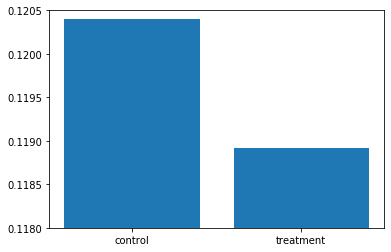

In [ ]:
x = ['control','treatment']
value = [control_conversion_rate,treatment_conversion_rate]
plt.bar(x,value)

plt.ylim(0.118,0.1205)

***is the difference significance?*** <br>

## Do Hypothesis Testing

In [ ]:
## making array
success = np.array([n_success_control,n_success_treatment])
obs = np.array([n_obs_control,n_obs_treatment])

H0: existing design and new design **have same** conversion rate <br>
H1: existing design and new design **do not have same** conversion rate

In [ ]:
?sp.proportions_ztest

In [ ]:
stats,pvalue = sp.proportions_ztest(success,obs)

In [ ]:
print('P-Value : {0:0.4f}'.format(pvalue))
if pvalue >= 0.05:
    print('Insufficient to reject H0')
else :
    print('Sufficient to reject H0')

P-Value : 0.2161
Insufficient to reject H0
